In [1]:
from osgeo import gdal
from osgeo import ogr
from osgeo import osr
from osgeo import gdal_array
from osgeo import gdalconst
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from matplotlib.colors import LightSource
import matplotlib.colors as colors
from skimage.transform import rescale, resize

In [10]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

terrain_cmap = truncate_colormap(plt.cm.terrain, 0.2, 1)

In [6]:
raster = gdal.Open("MDT_malla_100m_etrs89h30.ers")
z = raster.ReadAsArray()
#z=np.where(z==-9999,0,z)

#z = rescale(z, 0.5, anti_aliasing=True)
#z = resize(z, (z.shape[0] // 4, z.shape[1] // 4),anti_aliasing=True)

ancho=z.shape[1]
alto=z.shape[0]



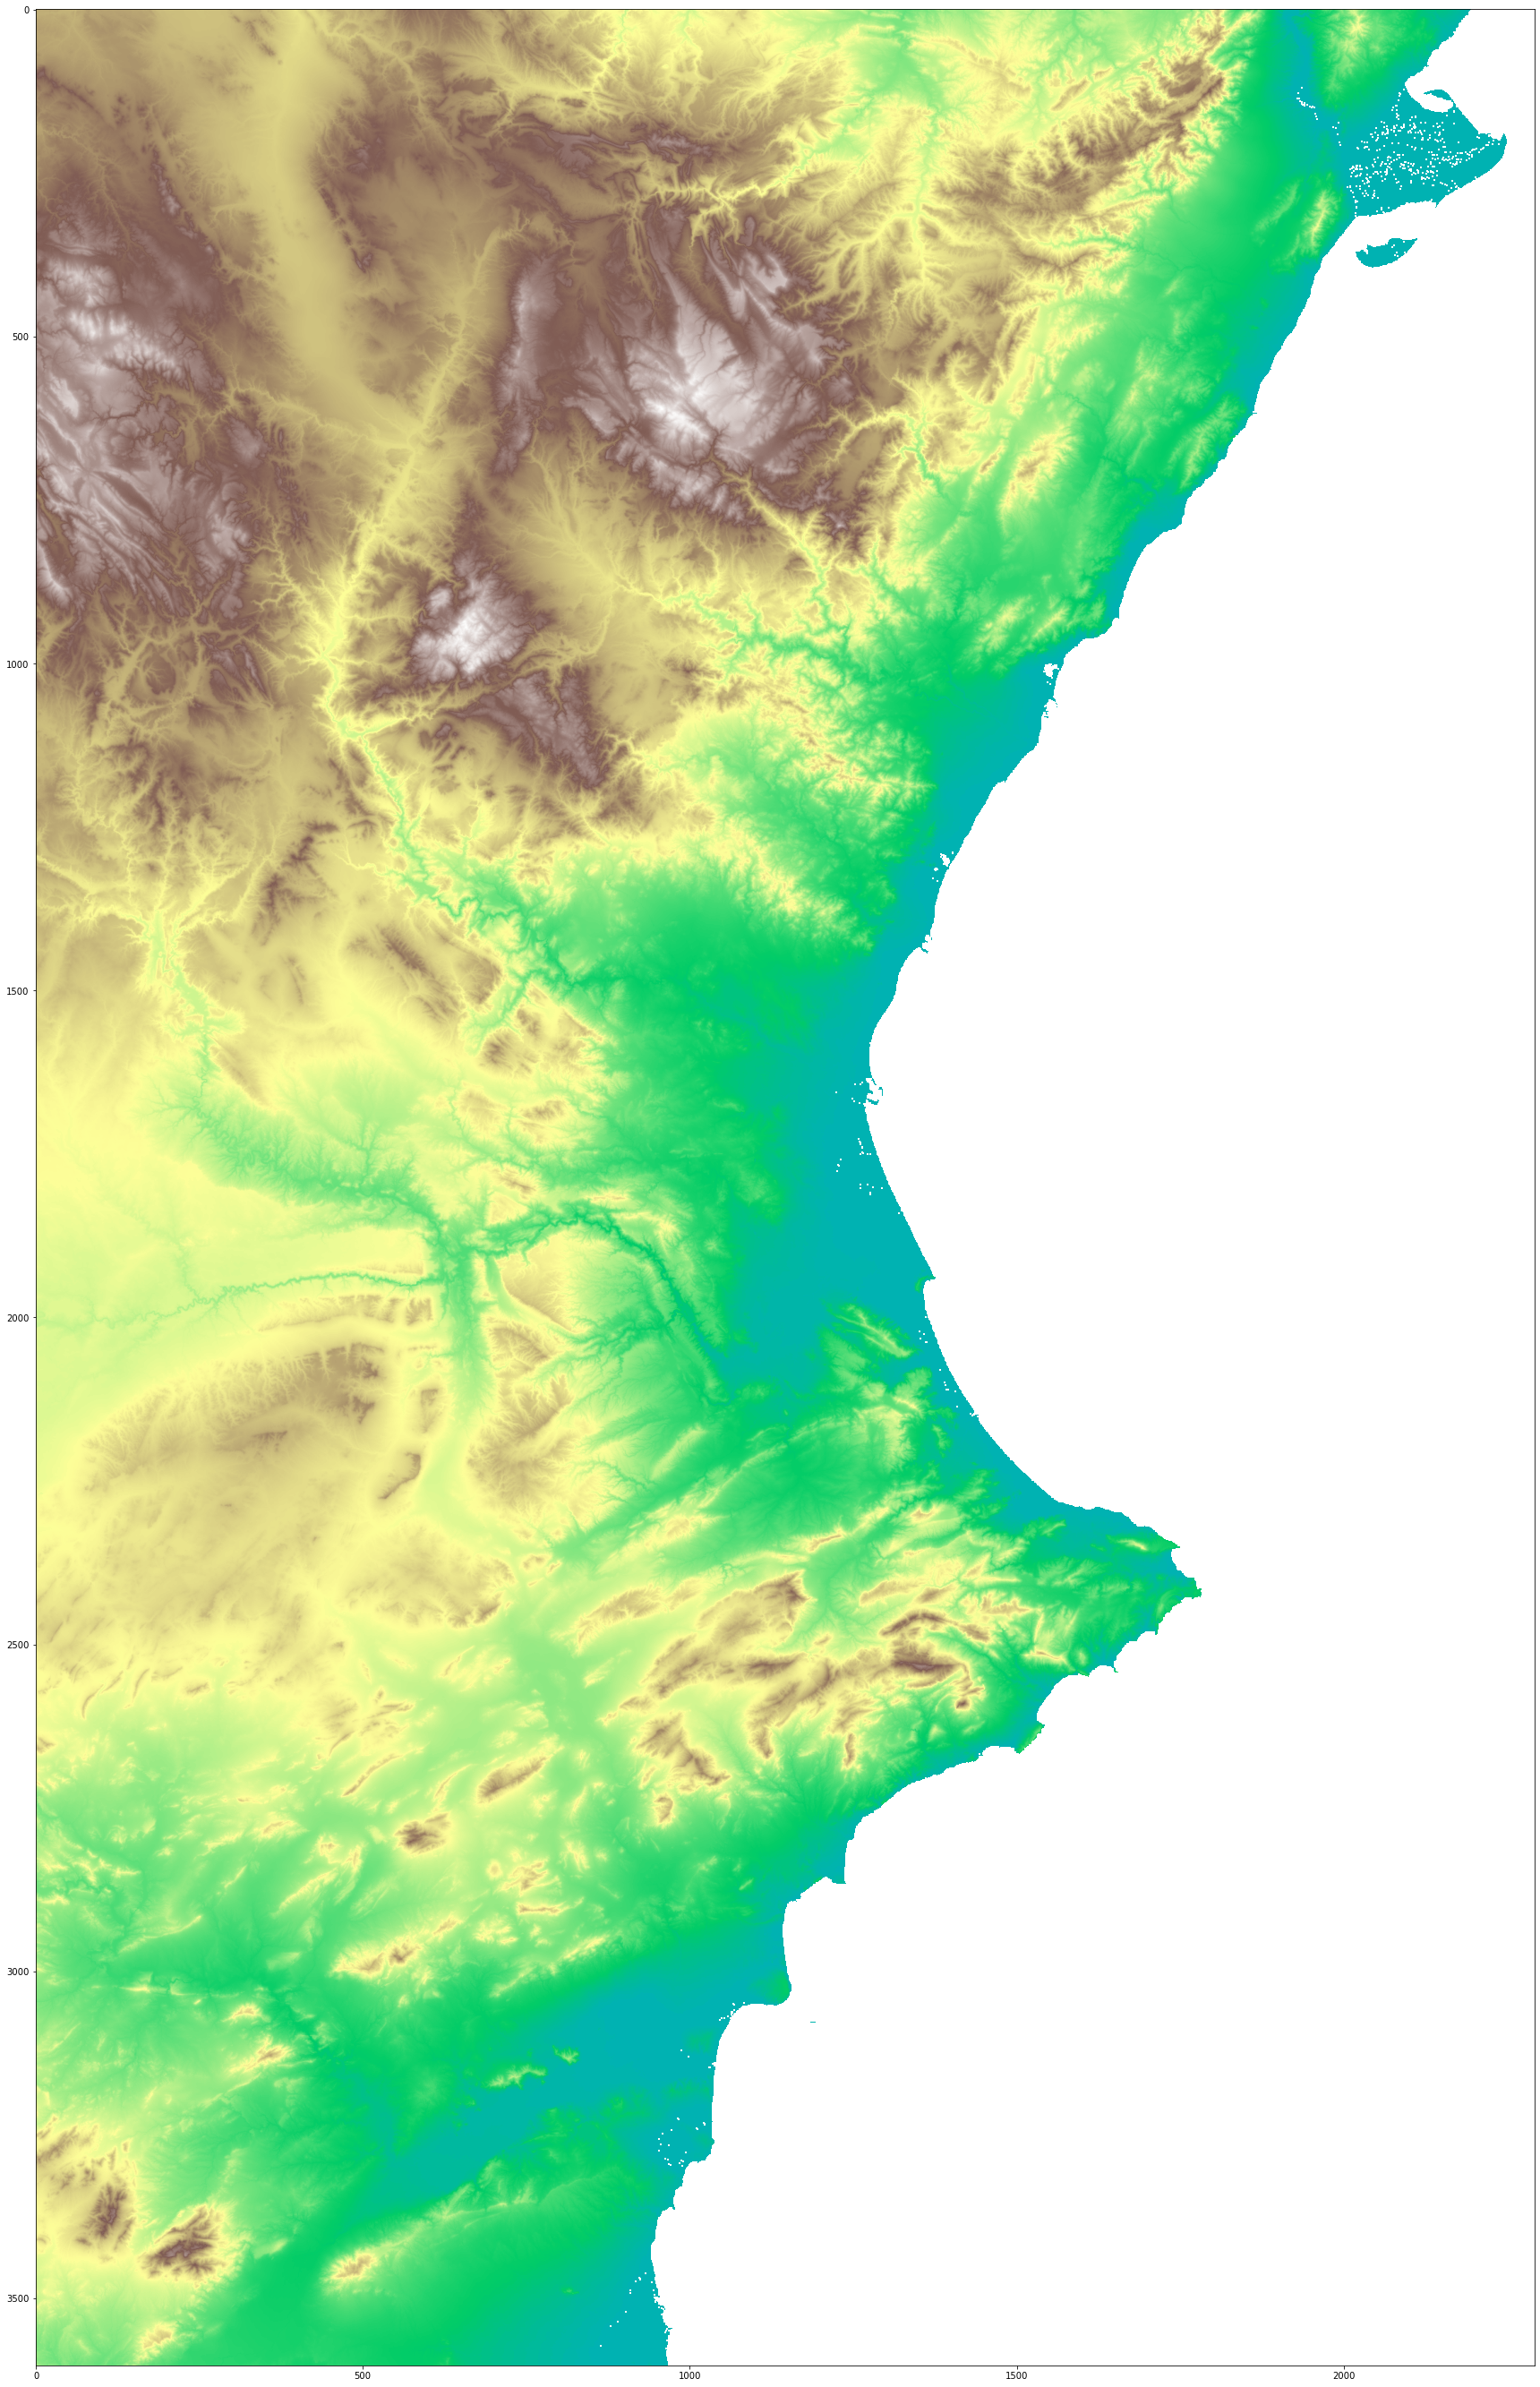

In [11]:
figure=plt.figure(figsize=(30,alto/30))
axes = figure.add_subplot()



axes.imshow(np.where(z<0,np.nan,z),cmap=terrain_cmap)
figure.savefig("mapa_2d_cv.png",facecolor="#FFFFFF",bbox_inches='tight')

/tmp/ipykernel_6446/2425142134.py:16: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  axes.plot_surface(x,y,np.where(z2<0,np.nan,z2),facecolors=facecolors,rcount=int(z2.shape[0]/calidad),ccount=int(z2.shape[1]/calidad))


hecho


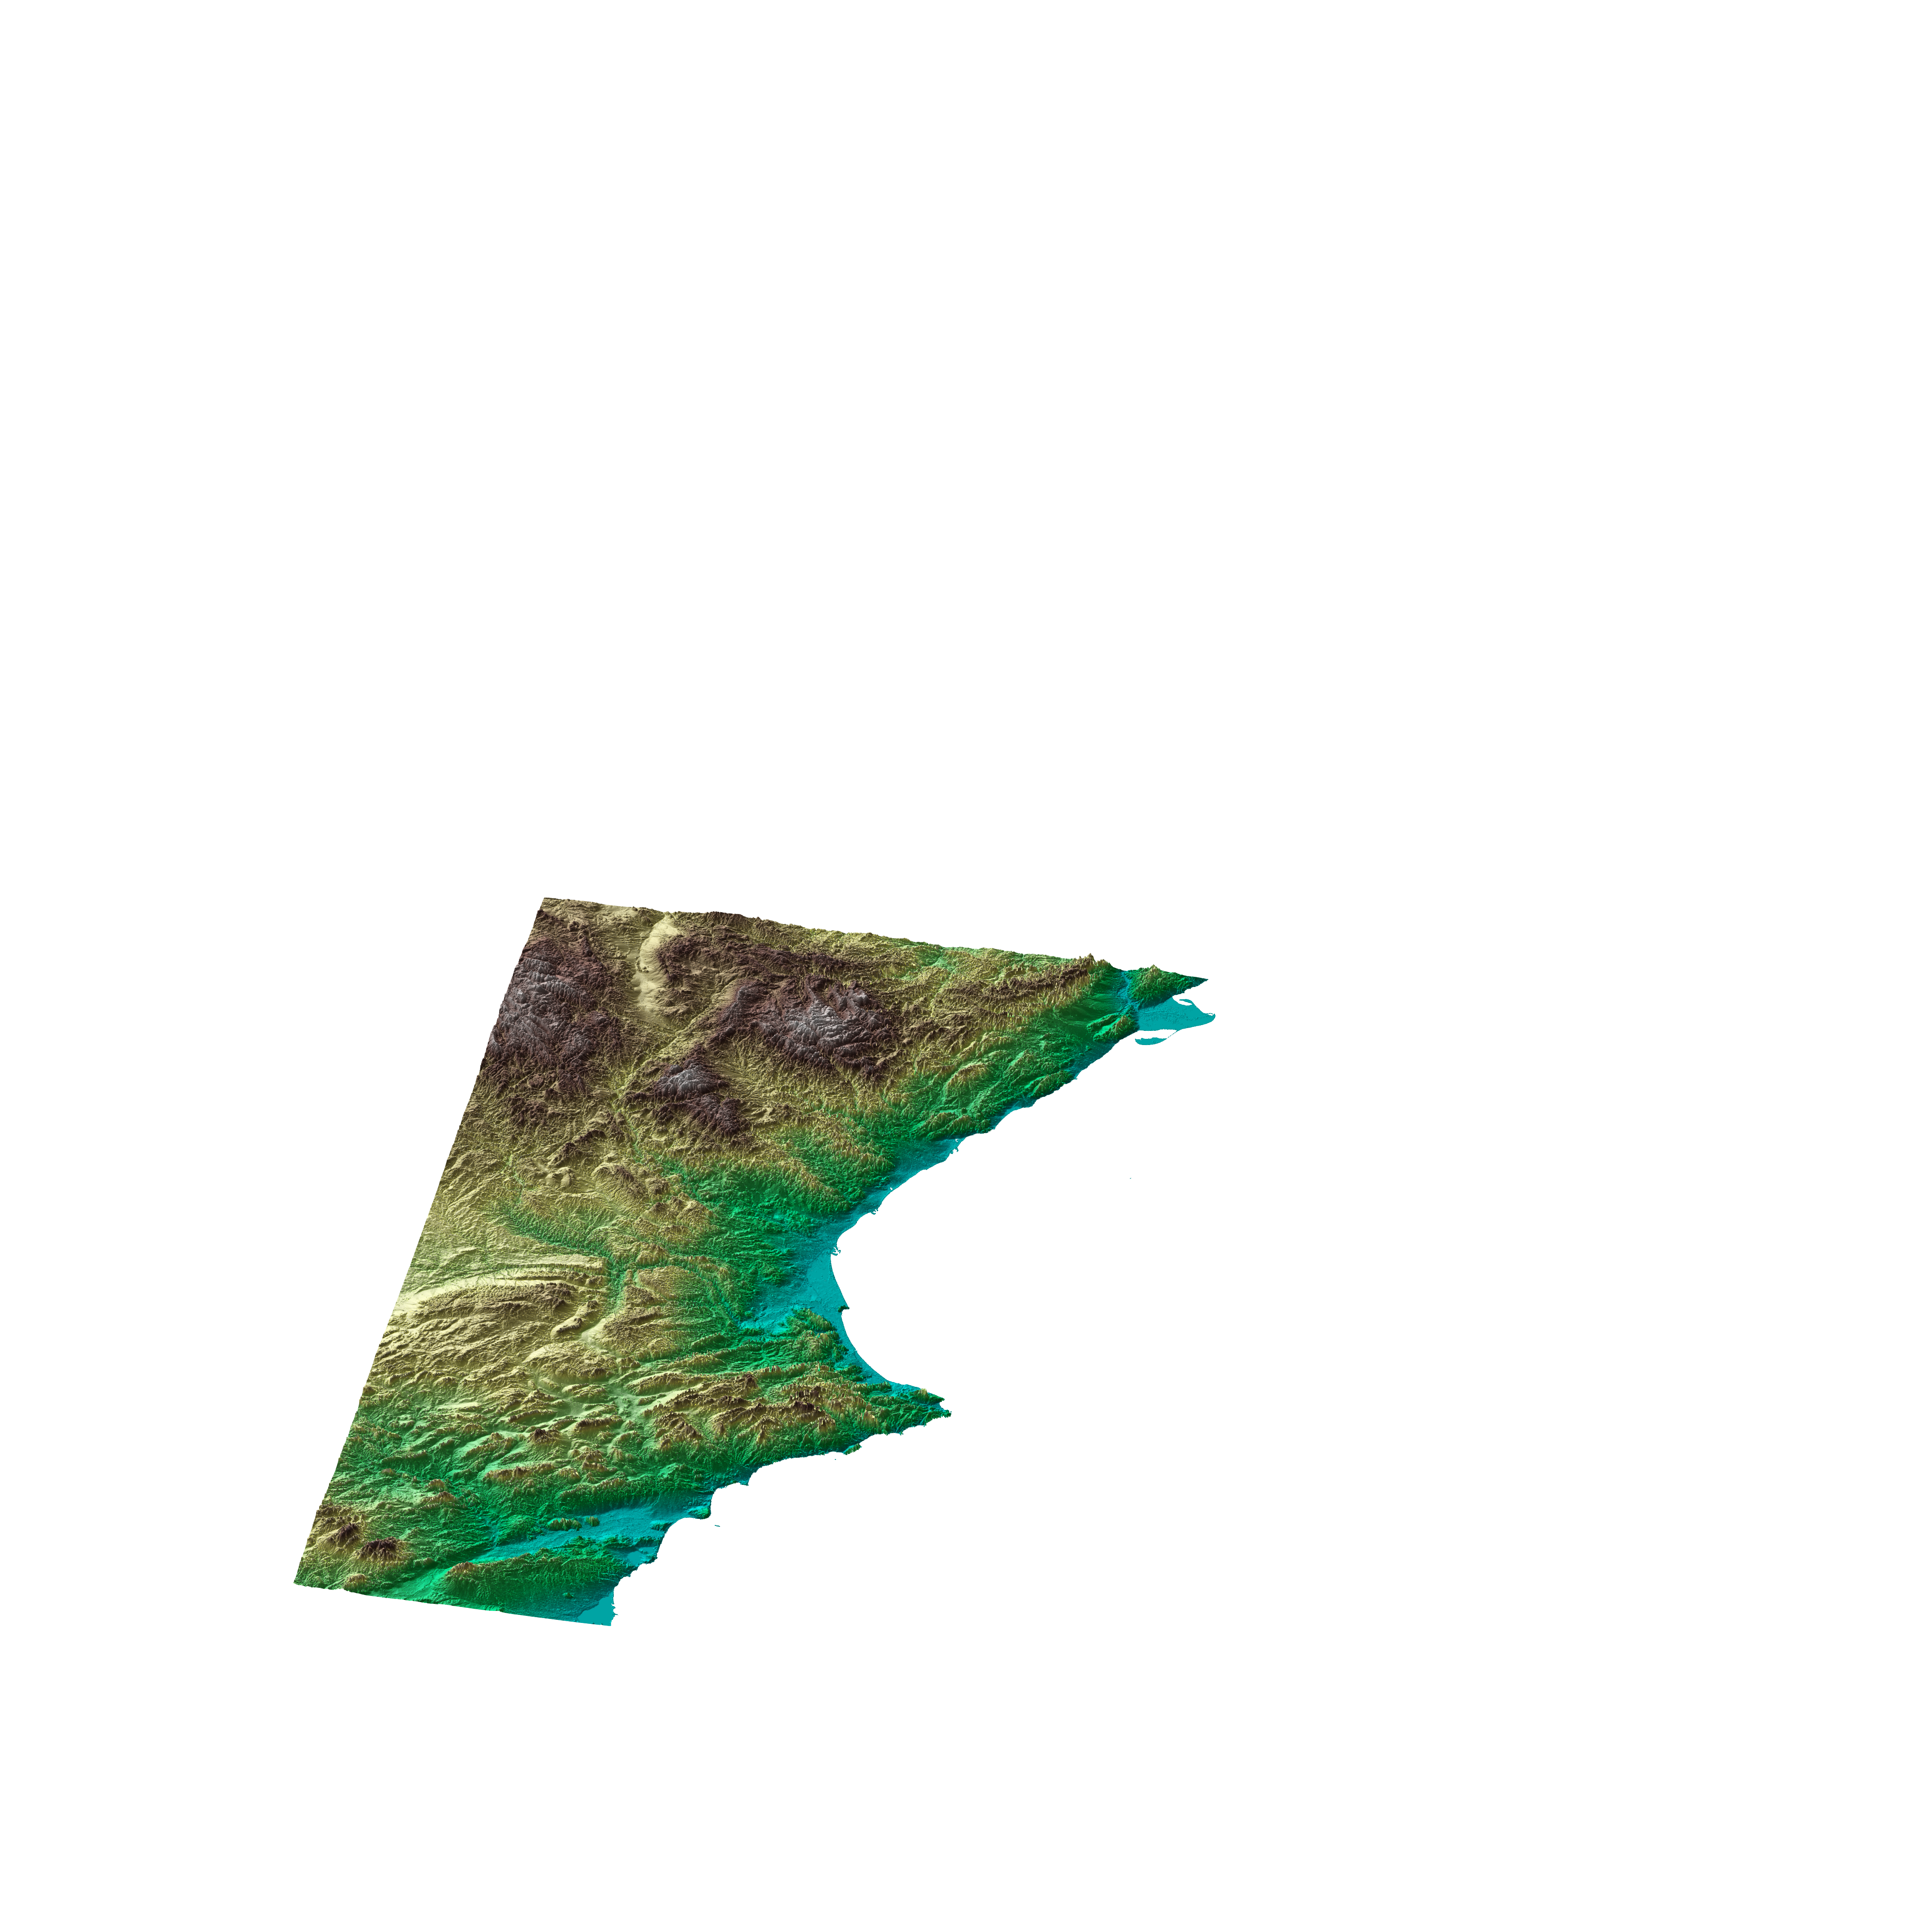

In [12]:
calidad=2 #Un valor entre 1 e infinito. Siendo 1 la mayor calidad.

x=np.arange(0,alto)
y=np.arange(0,ancho)
x,y=np.meshgrid(x,y)

z2=z.T

figure=plt.figure(figsize=(80,80))
axes = figure.add_subplot(projection='3d')


light_source = LightSource()
facecolors = light_source.shade(np.where(z2<0,0,z2),terrain_cmap, blend_mode='soft')

axes.plot_surface(x,y,np.where(z2<0,np.nan,z2),facecolors=facecolors,rcount=int(z2.shape[0]/calidad),ccount=int(z2.shape[1]/calidad))
axes.set_xlim(xmin=0,xmax=max(z2.shape[0],z2.shape[1]))
axes.set_ylim(ymin=0,ymax=max(z2.shape[0],z2.shape[1]))
axes.set_zlim(zmin=0,zmax=50000)
axes.view_init(elev=35, azim=10)

axes.set_xticks([])
axes.set_yticks([])
axes.set_zticks([])

axes.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
axes.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
axes.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

axes.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0)) 
axes.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0)) 
axes.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

figure.savefig("mapa_3d_cv.png",facecolor="#FFFFFF",bbox_inches='tight')
print("hecho")
